# CardioVascular Disease Prediction model


### This model predicts whether a user has cardiovasular disease or is no longer under cardiovascular disease danger.

### Dataset:  <a href="https://www.kaggle.com/sulianova/cardiovascular-disease-dataset?select=cardio_train.csv"> Link to the dataset used for this model </a>
This dataset has data of 70000 patients

## About dataset
* age in years int
* gender in 0-men, 1-women
* height int cm int
* weight in kg  float
* ap_hi(systolic BP) int
* ap_lo(diastolic BP) int
* cholestrol: 1: normal, 2: above normal, 3: well above normal
* gluc:       1: normal, 2: above normal, 3: well above normal
* smoke:      0: NO, 1: Yes
* alco:       0: NO, 1: Yes
* Active(exercise):  0: NO, 1: Yes
* cardio:  0: Safe, 1: Danger

## Dataset Processing

In [2]:
# importing required libraries/modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

#### Getting the dataset into a DataFrame using pandas.

In [3]:
dataset=pd.read_csv("cardio_train.csv",sep=";")

In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.shape

(70000, 13)

In [6]:
dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [7]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### As we can see here, that min value of ap_hi and ap_lo is -ve which can not be negative so these erroneous data must be discarded from the dataset

In [8]:
for ind in dataset.index:
    if dataset["ap_hi"][ind]<0 or dataset["ap_lo"][ind]<0:
        print(dataset["ap_hi"][ind],dataset["ap_lo"][ind])
        dataset.drop(ind,inplace = True)

-100 80
-115 70
-100 70
-140 90
-120 80
-150 80
-120 80
15 -70


In [9]:
dataset.shape

(69992, 13)

### Converting age into years

In [10]:
# The age is given in days, we have to convert it into years.
dataset["age"] = dataset["age"]/365
dataset["age"] = dataset["age"].astype("int")

In [11]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


### Dropping Column id

In [12]:
# Dropping id column, its of no use.
dataset = dataset.drop(columns = ["id"])

In [13]:
dataset.shape

(69992, 12)

In [14]:
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


### Converting gender values to 0 & 1
* 0: Male
* 1: Female

In [15]:
dataset["gender"] = dataset["gender"] % 2

In [16]:
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,0,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,0,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


## Dropping cardio column 
### X & Y of shape 11 & 1 are input and output for model respectively

In [17]:
X = dataset.drop(columns = ['cardio'])
Y = dataset['cardio']
print(X,Y)

       age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0       50       0     168    62.0    110     80            1     1      0   
1       55       1     156    85.0    140     90            3     1      0   
2       51       1     165    64.0    130     70            3     1      0   
3       48       0     169    82.0    150    100            1     1      0   
4       47       1     156    56.0    100     60            1     1      0   
5       60       1     151    67.0    120     80            2     2      0   
6       60       1     157    93.0    130     80            3     1      0   
7       61       0     178    95.0    130     90            3     3      0   
8       48       1     158    71.0    110     70            1     1      0   
9       54       1     164    68.0    110     60            1     1      0   
10      61       1     169    80.0    120     80            1     1      0   
11      51       0     173    60.0    120     80            1   

In [18]:
# shape of input is 11 with 69992 rows
X.shape

(69992, 11)

In [19]:
# shape of output Y is 1 with 69992 rows
Y.shape

(69992,)

### Splitting dataset into train and test in ratio 7:3

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 2)

In [21]:
print(X_train.shape,Y_train.shape)

(48994, 11) (48994,)


In [22]:
print(X_test.shape,Y_test.shape)

(20998, 11) (20998,)


## Using Different Binary Classification Algorithms

In [23]:
# to store the accuracies of different algorithms
Accuracy={}

In [24]:
# importing accuracy_score method from Scikit-Learn Library to calculate the accuracy score of the algorithms
from sklearn.metrics import accuracy_score

### Logisitic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr_pred = lr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
acc_lr = round(accuracy_score(lr_pred,Y_test)*100,2)
Accuracy["Logistic regression"]=acc_lr
print("The accuracy score for Logistic Regression Algorithm is " + str(acc_lr) + "%")

The accuracy score for Logistic Regression Algorithm is 71.18%


### Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,Y_train)
nb_pred = nb.predict(X_test)

In [27]:
acc_nb = round(accuracy_score(nb_pred,Y_test)*100,2)
Accuracy["Naive Bayes"]=acc_nb
print("The accuracy score for Naive Bayes Algorithm is " + str(acc_nb)+"%")

The accuracy score for Naive Bayes Algorithm is 59.0%


### SVM(Support vector machine) Classifier

In [28]:
from sklearn.svm import SVC

sv = SVC(random_state=6)
sv.fit(X_train, Y_train)
svm_pred = sv.predict(X_test)

In [29]:
acc_svm = round(accuracy_score(svm_pred,Y_test)*100,2)
Accuracy["SVM classifier"]=acc_svm
print("The accuracy score for SVM Classifier Algorithm is " + str(acc_svm)+" %")

The accuracy score for SVM Classifier Algorithm is 71.96 %


### K Nearest Neighbor Classification

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,Y_train)
knn_pred=knn.predict(X_test)

In [31]:
acc_knn = round(accuracy_score(knn_pred,Y_test)*100,2)
Accuracy["K Nearest Neighbor"]=acc_knn
print("The accuracy score for KNN Classifier is " + str(acc_knn)+" %")

The accuracy score for KNN Classifier is 71.35 %


### Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

max_acc = 0

# getting best values of random_state
for rs in range(300):
    dt = DecisionTreeClassifier(random_state=rs)
    dt.fit(X_train,Y_train)
    dt_pred = dt.predict(X_test)
    curr_acc = round(accuracy_score(dt_pred,Y_test)*100,2)
    if(curr_acc>max_acc):
        max_acc = curr_acc
        best_rs = rs

print(rs)
dt = DecisionTreeClassifier(random_state=best_rs)
dt.fit(X_train,Y_train)
dt_pred = dt.predict(X_test)

299


In [33]:
acc_dt = round(accuracy_score(dt_pred,Y_test)*100,2)
Accuracy["Decision Tree"]=acc_dt
print("The accuracy score for Decision Tree is " + str(acc_dt)+" %")

The accuracy score for Decision Tree is 63.35 %


### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

max_acc = 0

# getting best value for random_state
for rs in range(50):
    rf = RandomForestClassifier(random_state=rs)
    rf.fit(X_train,Y_train)
    rf_pred = rf.predict(X_test)
    curr_acc = round(accuracy_score(rf_pred,Y_test)*100,2)
    if(curr_acc>max_acc):
        max_acc = curr_acc
        best_rs = rs

print(max_acc)
print(best_rs)

rf = RandomForestClassifier(random_state=best_rs)
rf.fit(X_train,Y_train)
rf_pred = rf.predict(X_test)

70.63
21


In [35]:
acc_rf = round(accuracy_score(rf_pred,Y_test)*100,2)
Accuracy["Random Forest"]=acc_rf
print("The accuracy score for Random Forest  Algorithm is " + str(acc_rf)+" %")

The accuracy score for Random Forest  Algorithm is 70.63 %


### Neural Network

In [36]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
# Creating Keras Sequential Model
model = Sequential()

# 1st Hidden Layer
model.add(Dense(15,activation='relu',input_dim=11))
print(model.output_shape)

# 2nd Hidden Layer
model.add(Dense(7,activation='relu',input_dim=15))
print(model.output_shape)

# Output Layer
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

(None, 15)
(None, 7)


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(X_train,Y_train,epochs=300,batch_size=22)

Epoch 1/300
2227/2227 [==============================] - 2s 932us/step - loss: 0.8432 - accuracy: 0.6778
Epoch 2/300
2227/2227 [==============================] - 2s 918us/step - loss: 0.6671 - accuracy: 0.6866
Epoch 3/300
2227/2227 [==============================] - 2s 925us/step - loss: 0.6374 - accuracy: 0.6912
Epoch 4/300
2227/2227 [==============================] - 2s 944us/step - loss: 0.6436 - accuracy: 0.6955
Epoch 5/300
2227/2227 [==============================] - 2s 961us/step - loss: 0.6295 - accuracy: 0.6947
Epoch 6/300
2227/2227 [==============================] - 2s 965us/step - loss: 0.6304 - accuracy: 0.6992
Epoch 7/300
2227/2227 [==============================] - 2s 1ms/step - loss: 0.6148 - accuracy: 0.6978
Epoch 8/300
2227/2227 [==============================] - 2s 1ms/step - loss: 0.6181 - accuracy: 0.7016
Epoch 9/300
2227/2227 [==============================] - 2s 996us/step - loss: 0.6128 - accuracy: 0.7062
Epoch 10/300
2227/2227 [==============================] - 3

2227/2227 [==============================] - 2s 992us/step - loss: 0.5508 - accuracy: 0.7283
Epoch 157/300
2227/2227 [==============================] - 2s 956us/step - loss: 0.5517 - accuracy: 0.7283
Epoch 158/300
2227/2227 [==============================] - 2s 1ms/step - loss: 0.5500 - accuracy: 0.7291
Epoch 159/300
2227/2227 [==============================] - 2s 983us/step - loss: 0.5516 - accuracy: 0.7293
Epoch 160/300
2227/2227 [==============================] - 2s 980us/step - loss: 0.5508 - accuracy: 0.7286
Epoch 161/300
2227/2227 [==============================] - 2s 995us/step - loss: 0.5507 - accuracy: 0.7286
Epoch 162/300
2227/2227 [==============================] - 2s 956us/step - loss: 0.5507 - accuracy: 0.7276
Epoch 163/300
2227/2227 [==============================] - 2s 971us/step - loss: 0.5506 - accuracy: 0.7286
Epoch 164/300
2227/2227 [==============================] - 3s 1ms/step - loss: 0.5509 - accuracy: 0.7295
Epoch 165/300
2227/2227 [==============================

In [40]:
nn_pred = model.predict(X_test)

# rounding the prediction nn_pred to zeros and ones, and rehaping into 1d array
rounded = [round(x[0]) for x in nn_pred]
print(nn_pred*100,nn_pred.shape)

nn_pred = rounded

# finding accuracy of the model
from sklearn.metrics import accuracy_score
acc_nn = round(accuracy_score(nn_pred,Y_test)*100,2)
Accuracy["Neural Network"]=acc_nn

print("The accuracy score for Neural Network model is " + str(acc_nn)+" %")

[[70.044136]
 [24.909237]
 [29.962713]
 ...
 [37.5975  ]
 [59.53579 ]
 [37.312145]] (20998, 1)
The accuracy score for Neural Network model is 72.72 %


## Comparing the accuracy of all the above algorithms and using the best Model

{'Logistic regression': 71.18, 'Naive Bayes': 59.0, 'SVM classifier': 71.96, 'K Nearest Neighbor': 71.35, 'Decision Tree': 63.35, 'Random Forest': 70.63, 'Neural Network': 72.72}


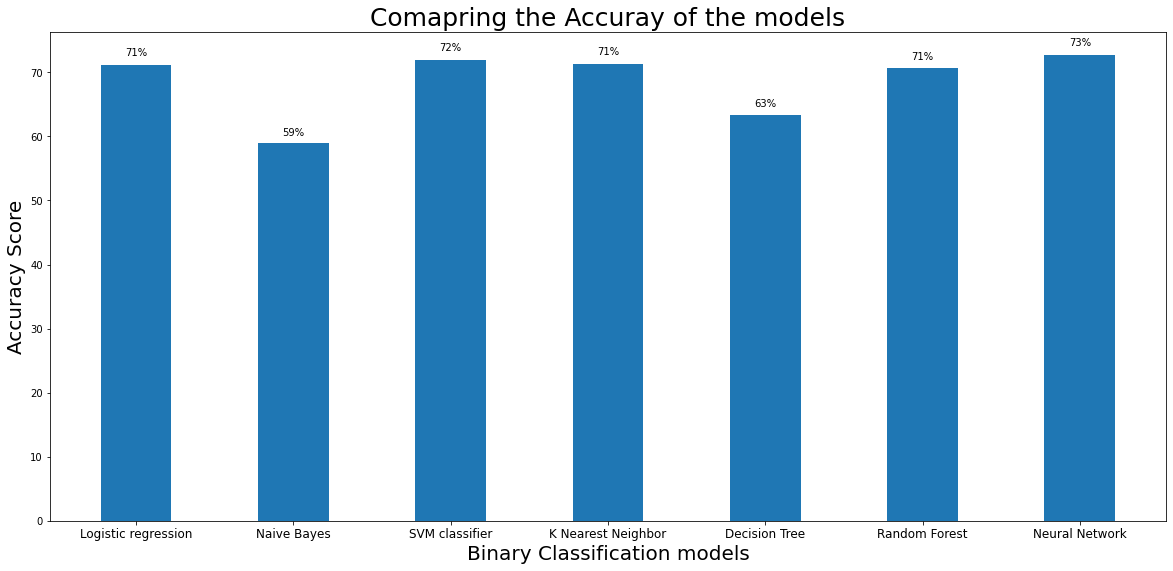

In [41]:
print(Accuracy)
plt.figure(figsize=(20, 9))
fig=plt.bar(range(len(Accuracy)), list(Accuracy.values()), align='center', width=0.45)
plt.xticks(range(len(Accuracy)), list(Accuracy.keys()),fontsize=12)
plt.xlabel("Binary Classification models", fontsize=20)
plt.ylabel("Accuracy Score", fontsize=20)
plt.title("Comapring the Accuray of the models", fontsize=25)

for p in fig:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height/100.0:.0%}', (x + width/2, y + height*1.02), ha='center')

# saving the plot for using in th report
plt.savefig('compAlgo.png')
plt.show()

### As we can see maximum Accuracy is for Neural Networks i.e. 72.72% also for using ML model in mobile we can convert keras neural network to lightweight mobile model which has low latency using Tensorflow Lite developer tool

## Converting Neural Network model to tflite model
### TensorFlow Lite is TensorFlow's lightweight solution for mobile and embedded devices. It lets you run machine-learned models on mobile devices with low latency

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import lite

In [43]:
keras_file="model.h5"
tf.keras.models.save_model(model,keras_file)
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("model.tflite","wb").write(tfmodel)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\mihir\AppData\Local\Temp\tmpuhhg9m8w\assets


2860

## model.tflite is used in Android studio to create an android application